<a href="https://colab.research.google.com/github/Manchal09/mainflow-tasks/blob/main/MainFlow_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-6:Part 1 Time Series**

Objective Analyze sales data over time and forecast future sales using statistical models

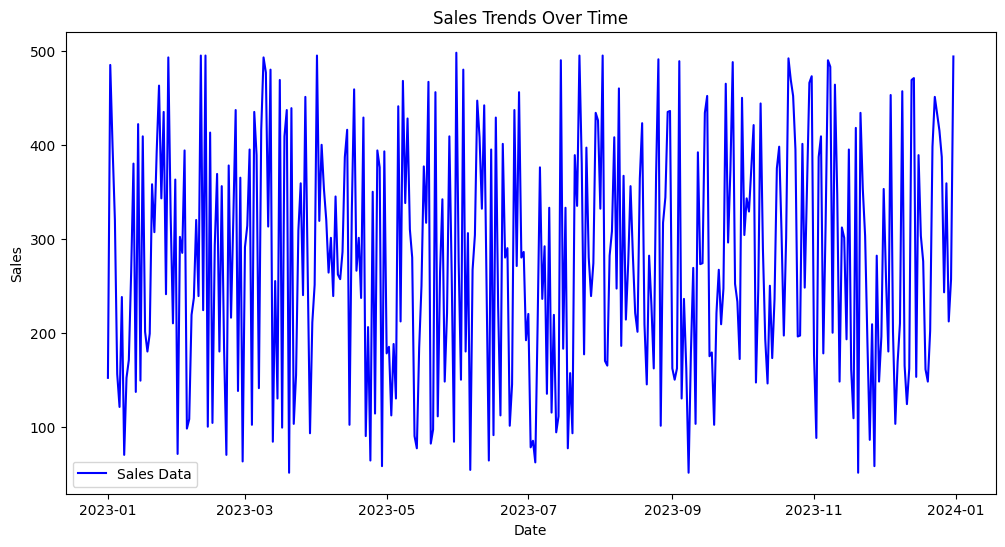

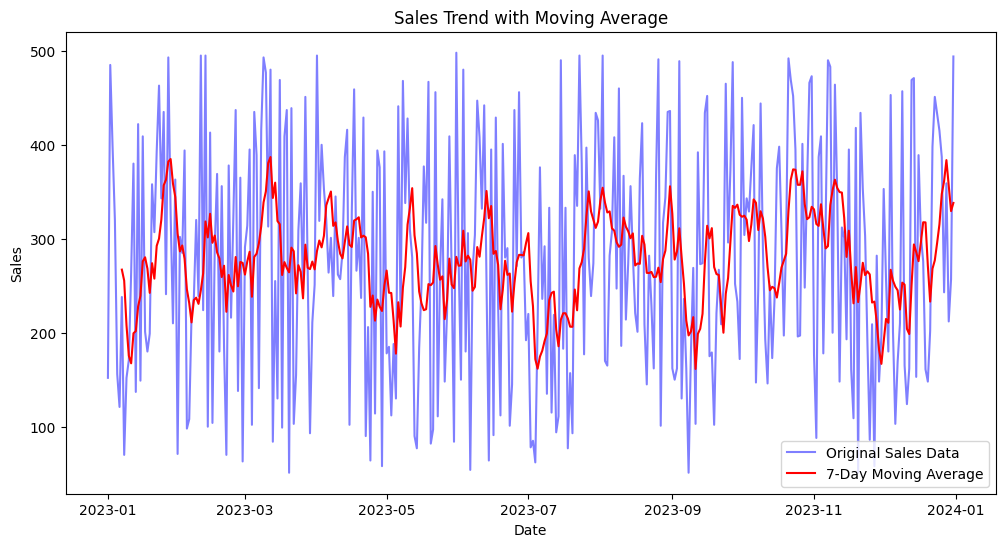

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 134.13361457816038
MAPE: 0.6028510478907446


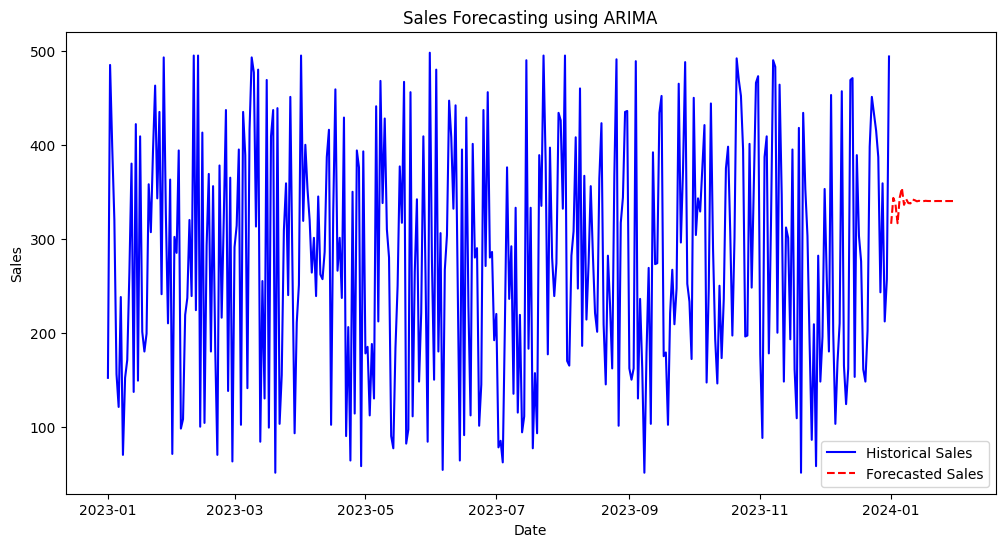

Forecasted Sales Values:
          Date  Forecasted_Sales
0  2024-01-01        315.920293
1  2024-01-02        343.481122
2  2024-01-03        337.053772
3  2024-01-04        316.520564
4  2024-01-05        343.797144
5  2024-01-06        353.939665
6  2024-01-07        336.118617
7  2024-01-08        342.182970
8  2024-01-09        337.980445
9  2024-01-10        337.657045
10 2024-01-11        341.730532
11 2024-01-12        341.039528
12 2024-01-13        339.843522
13 2024-01-14        340.411402
14 2024-01-15        339.677970
15 2024-01-16        340.010827
16 2024-01-17        340.386913
17 2024-01-18        340.184484
18 2024-01-19        340.154279
19 2024-01-20        340.159767
20 2024-01-21        340.083917
21 2024-01-22        340.158387
22 2024-01-23        340.176260
23 2024-01-24        340.152538
24 2024-01-25        340.156208
25 2024-01-26        340.148569
26 2024-01-27        340.145047
27 2024-01-28        340.155146
28 2024-01-29        340.154141
29 2024-01-30 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Step 1: Generate Random Dataset
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')
sales_data = np.random.randint(50, 500, size=len(date_range))

# Create DataFrame
sales_df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})

# Step 2: Convert Date column to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.set_index('Date', inplace=True)

# Step 3: Visualize Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Sales'], label='Sales Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

# Step 4: Apply Moving Average to observe trends
sales_df['Moving_Avg'] = sales_df['Sales'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Sales'], label='Original Sales Data', color='blue', alpha=0.5)
plt.plot(sales_df['Moving_Avg'], label='7-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend with Moving Average')
plt.legend()
plt.show()

# Step 5: Train ARIMA Model
model = ARIMA(sales_df['Sales'], order=(5,1,0))  # Adjust ARIMA parameters as needed
model_fit = model.fit()

# Step 6: Forecast Sales for Future Periods
forecast_steps = 30  # Forecast for 30 future days
forecast = model_fit.forecast(steps=forecast_steps)
dates = pd.date_range(sales_df.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast_df = pd.DataFrame({'Date': dates, 'Forecasted_Sales': forecast.values})

# Step 7: Validate Model Performance
rmse = np.sqrt(mean_squared_error(sales_df['Sales'][-forecast_steps:], forecast[:forecast_steps]))
mape = mean_absolute_percentage_error(sales_df['Sales'][-forecast_steps:], forecast[:forecast_steps])
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

# Step 8: Plot Forecast vs Actual Sales
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Sales'], label='Forecasted Sales', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting using ARIMA')
plt.legend()
plt.show()

# Step 9: Deliverables
print("Forecasted Sales Values:\n", forecast_df)

**Project Description: Part 2 Predicting Heart Disease Using
Logistic Regression**

Objective Predict whether a patient has heart disease based on key medical parameters.

In [37]:
#Creating Dataset
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
num_samples = 500  # Change the number of samples if needed
ages = np.random.randint(30, 80, num_samples)  # Age between 30 and 80
genders = np.random.choice(['Male', 'Female'], num_samples)  # Random Male/Female
cholesterol = np.random.randint(150, 300, num_samples)  # Cholesterol levels
blood_pressure = np.random.randint(90, 180, num_samples)  # Blood Pressure
heart_disease = np.random.choice([0, 1], num_samples, p=[0.7, 0.3])  # 70% no disease, 30% disease

# Create DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Cholesterol': cholesterol,
    'Blood_Pressure': blood_pressure,
    'Heart_Disease': heart_disease
})

# Save as CSV
df.to_csv('heart_disease.csv', index=False)

print("Dataset saved as heart_disease.csv")


Dataset saved as heart_disease.csv


In [38]:
df = pd.read_csv('heart_disease.csv')
print(df.head())


   Age  Gender  Cholesterol  Blood_Pressure  Heart_Disease
0   68  Female          267             150              1
1   58    Male          293             106              0
2   44    Male          157             163              1
3   72  Female          281             146              1
4   37    Male          253             144              0


Dataset Sample:
    Age  Gender  Cholesterol  Blood_Pressure  Heart_Disease
0   68  Female          267             150              1
1   58    Male          293             106              0
2   44    Male          157             163              1
3   72  Female          281             146              1
4   37    Male          253             144              0

Missing Values:
 Age               0
Gender            0
Cholesterol       0
Blood_Pressure    0
Heart_Disease     0
dtype: int64

Confusion Matrix:
 [[75  0]
 [25  0]]

Model Performance:
Accuracy: 0.75
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


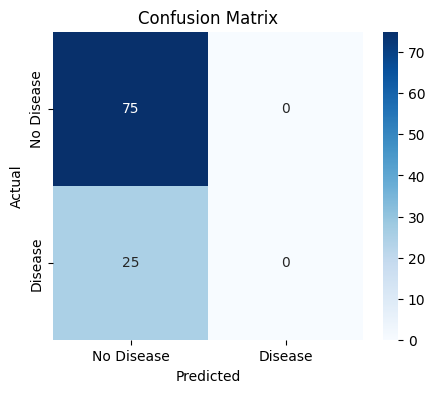

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("heart_disease.csv")  # Ensure the dataset is in the working directory

# Display first few rows of the dataset
print("Dataset Sample:\n", df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Convert categorical column 'Gender' to numerical values using Label Encoding
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Define features (X) and target variable (y)
X = df[['Age', 'Gender', 'Cholesterol', 'Blood_Pressure']]
y = df['Heart_Disease']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("\nConfusion Matrix:\n", conf_matrix)
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualizing the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
